In [237]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline

In [238]:
data = pd.read_csv("Income.csv")
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


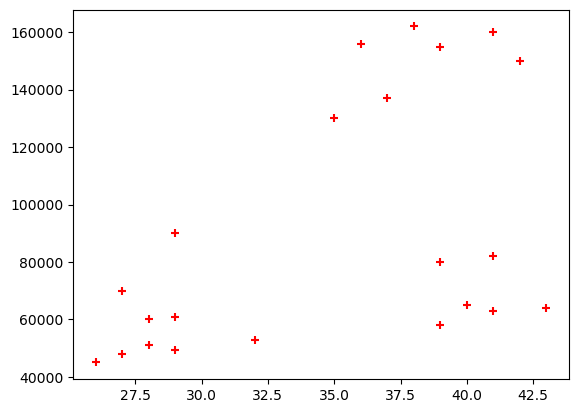

In [182]:
plt.scatter(data["Age"], data["Income($)"], color = 'red', marker = '+')

In [183]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [235]:
y_predicted = km.fit_predict(data[["Age", "Income($)"]])
y_predicted

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 4, 1, 1, 0, 0, 0, 5, 5, 3, 3, 7, 7, 7, 7, 6, 2, 2, 8, 9, 9, 2])

In [209]:
data['cluster'] = y_predicted

In [210]:
data

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


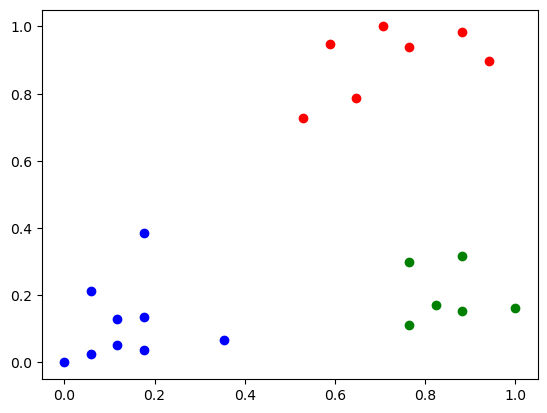

In [236]:
data0 = data[data.cluster == 0]
data1 = data[data.cluster == 1]
data2 = data[data.cluster == 2]
plt.scatter(data0.Age, data0["Income($)"], color = 'red')
plt.scatter(data1.Age, data1["Income($)"], color = 'blue')
plt.scatter(data2.Age, data2["Income($)"], color = 'green')

In [212]:
scaler = MinMaxScaler()
scaler.fit(data[["Income($)"]])
data['Income($)'] = scaler.transform(data[["Income($)"]])

scaler.fit(data[["Age"]])
data["Age"] = scaler.transform(data[["Age"]])

In [233]:
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


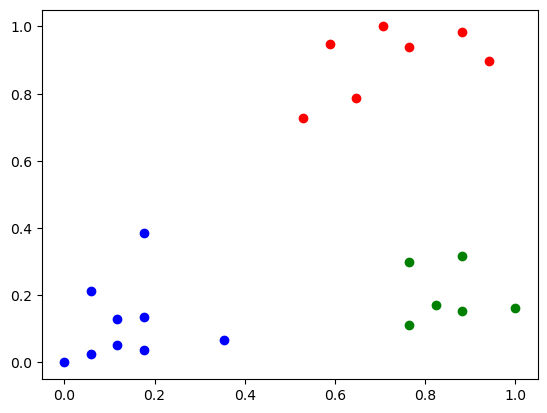

In [213]:
data0 = data[data.cluster == 0]
data1 = data[data.cluster == 1]
data2 = data[data.cluster == 2]
plt.scatter(data0.Age, data0["Income($)"], color = 'red')
plt.scatter(data1.Age, data1["Income($)"], color = 'blue')
plt.scatter(data2.Age, data2["Income($)"], color = 'green')

In [222]:
k_range = range(1, 11)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age','Income($)']])
    sse.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [223]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.2766936276300278,
 0.2106667848801052,
 0.16869711728567788,
 0.13265419827245162,
 0.10497488680620906,
 0.08191902286777038]

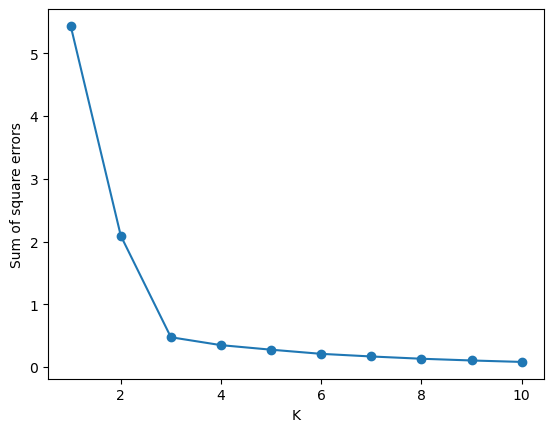

In [232]:
plt.xlabel('K')
plt.ylabel('Sum of square errors')
plt.scatter(k_range, sse)
plt.plot(k_range, sse)